# Multi-Class Classification Using Logistic Regression Classifiers

This project uses one-vs-rest multi-class classification to recognize handwritten numbers. This kind of multi-class classification problem can be accomplished rather succintly with pre-built Python libraries and Google API's. This project, however, builds the recognition model from scratch using a vectorized cost and gradient descent functions and a set of logistic regression classifiers. The data used is generated using the scikit-learn library.

## 1. Import Data

We will use the sklearn library to create a labeled dataset of handwritten digits. The dataset includes 1,797 samples.

Dataset dimensions: (1797, 64)


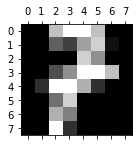

In [1]:
# Import sklnear and matplotlib libraries needed
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# Ignore convergence warnings of solver using less than the max number of iterations
import warnings
warnings.filterwarnings('ignore')

# Create our dataset of handwritten digits
digits = load_digits()
print("Dataset dimensions: {}".format(digits.data.shape))

# Convert this dataset into the variables we'll need to build our models
x = digits.data
y = digits.target
num_labels = (np.unique(y)).shape[0]
imgs = digits.images

# Display one example to visualize what the data looks like
plt.figure(figsize=(2,2))
plt.gray()
plt.matshow(digits.images[1200], fignum=1, aspect='auto')
plt.show()

From the visualization above, we can see that each sample is an 8 pixel by 8 pixel grayscale image of a handwritten number. Each pixel represents a floating point number corresponding to the intensity (0 = black up to 16 = white) at that particular location. Let's take a look at the underlying data for the above image of the number 7.

In [2]:
imgs[1200]

array([[ 0.,  0., 12., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  6.,  4., 10., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  5.,  9., 16., 16., 12.,  0.],
       [ 0.,  3., 16., 16., 11.,  3.,  0.,  0.],
       [ 0.,  0.,  7., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 11.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 16.,  3.,  0.,  0.,  0.,  0.]])

To confirm that this is indeed a 7, we can check the label for this example:

In [3]:
print("The label of the {}th handwritten digit is {}".format(1199, y[1200]))

The label of the 1199th handwritten digit is 7


Great, so we have our dataset and our labels. While the data looks one way above, it's actually a matrix with 1,797 rows (corresponding to the number of samples in the dataset) and 64 columns (one for each pixel in an 8-by-8 image). Therefore, our data can be represented by the matrices below, where m = 1,797.

<img src="2020-12-6 X matrix.PNG" align="center"/> <img src="2020-12-6 Y vector.PNG" align="center"/> 

Note that in our labels vector, y, numbers 1 through 9 are labeled as such, but 10's are labeled as "0".

## 2. Building the Logistic Regression Models

### 2.1 Hypothesis Function

Due to the fact that we're trying to classify these digits into 10 classes, we'll need to train 10 different logistic regression classifiers - one for each digit. Let's start with the hypothesis function for a logistic regression model.

<img src="2020-12-6 hypothesis function.PNG" align="center"/>

That's a bit hard to visualize, so let's ensure we know what we're representing here. The sigmoid function can be seen below.

<img src="2020-12-7 sigmoid function.PNG" style="width:500px;height:300px" align="center"/>

The sigmoid function allows us to determine a probability based on our model parameters and the input data. Briefly, if we build a classifier to detect for the digit "2", then we apply our model parameters to the data and determine a resulting value of -2, then our sigmoid function would kick out a value of 0.1192. In our classifier problem, that would mean there's an 11.92% chance that the digit is a "2". Conversely, if applying our detect-for-2 model resulted in a value of 4, then our sigmoid function would return 0.982, meaning there's a 98.2% chance that the digit is, in fact, a "2".

### 2.2 Cost Function

With the hypothesis function established, we can now begin to build the logistic regression model. We'll first build the cost function, then we'll move on to optimizing our cost function. We'll include the standard cost plus a regularization term in the cost function to prevent the model from overfitting the data.

Here's the cost function:

<img src="2020-12-6 cost function w reg.PNG" align="center"/>

There's a lot in that one equation, so let's break it down. Remember that this is a classifier problem, so y can only be 0 or 1 (i.e. it *is* a certain digit, and y=1, or it is *not* that digit, and y=0). It cannot be 0.1, 0.5, or anything except 0 or 1. 

However, our hypothesis function returns a *probability*, meaning that it may get very close to 0 or 1, but it will never actually be 0 or 1. Therefore, it can occupy any value between 0 or 1, such as 0.25. 

Now, because our y-values are binary, we need a way to calculate the cost for both possible values of y. This is why there are two cost function components above: one for y=1 and one for y=0. Let's visualize those two functions below.

<img src="2020-12-8 cost component graph.PNG" align="center"/>

There are two curves above, one for y=1 and one for y=0. Let's look first at y=1. Notice that if our hypothesis function predicts a 1, the cost is zero - it's a perfect prediction, so there is no cost. If our prediction is 0.8, then the cost is larger, but still relatively small because we're close to the target of y=1. If, on the other hand, our hypothesis function predicts 0.1, then we're significantly off the mark, and the cost function ramps up accordingly. 

It's the same story for y=0, where a prediction of 0 results in no cost, and the cost increases as you move towards 1 and away from the correct value.

Finally, we have what I'm calling an "activator". This is simply your y-value, and it determines which cost function you use. For each example in our dataset, y either is (y=1) or is not (y=0) the digit in question. Once we know y, we know which cost function to use, and we add it to our total cost per the equation above.

Lastly, we just have our regularization term. This term is added to keep our theta values from growing too large, which would result in overfitting of our dataset. Note that we do *not* regularize the $theta_0$ term, however. We don't want to penalize the model for selecting a large bias term, we just don't want it to emphasize the higher orders in the model.

### 2.2 Vectorizing the Cost & Gradient Functions

Due to the size of our dataset, our logistic regression classifiers will involve quite a bit of calculation, so we need to use the vectorized form of the cost function since it's so much faster. Here's the vectorized cost function:

<img src="2020-12-6 vec cost function w reg.PNG" align="center"/>

In our cost function, we're also going to include the gradient term so that we can use a built-in optimization function later (we'll use the optimization function instead of gradient descent). Note that the gradient function for our logistic regressions will look very similar to the gradient function in a linear regression, but it is distinct in that the hypothesis function is unique between linear and logistic regression.

<img src="2020-12-6 gradient functions.PNG" align="center"/>

Let's build it.

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def computeCost(theta, x, y, lam):
    '''
    This is the cost function for a logistic regression model.
    This function takes in an nx1 matrix "theta", an mxn matrix "x", 
    and an mx1 matrix "y", as well as a regularization weighting term
    "lam." It then computes and returns the cost and gradient.
    '''
    
    # Set up our m variable (number of samples)
    m = len(y)
    
    # Compute the cost function
    # Set up our hypothesis prediction
    h = sigmoid(x @ theta)
    # Compute the first term, which is the y=1 curve
    f_comp = -1*y*np.log(h).flatten()
    # Compute the second term, which is the y=0 curve
    s_comp = -1*(1-y)*np.log(1-h).flatten()
    # Put the two terms together, resulting in the logistic regression cost
    j_lr = (1/m) * (np.sum(f_comp) + np.sum(s_comp))    
    # Compute the regularization cost term (don't regularize the theta_0 value)
    theta_reg = theta[1:]
    j_reg = (lam/(2*m)) * np.sum(theta_reg**2)
    # Add the regularization cost to the logistic regression cost
    j = j_lr + j_reg

    # Compute the gradient
    g_lr = (1/m) * (x.transpose() @ (h.flatten()-y))
    # Compute the gradient regularization parameter
    theta_reg = theta[1:]
    g_reg = (lam/m) * np.sum(theta_reg)
    # Add regularization to the gradient
    grad = g_lr + g_reg    
    
    # Return the cost and gradient
    return j, grad

## 3. Training the Logistic Regression Models

We have one more function to write, and that's our one-vs-rest function. This function will use a built-in minimization function from the scipy.optimize library to simultaneously adjust all theta values towards their optimal settings. We could use gradient descent, but the minimize function is more efficient for larger-dimension theta vectors, like the one we have in this project.

In [5]:
from scipy.optimize import minimize

def oneVsRest(x, y, num_labels, lam):

    # Set up our variables n (number of parameters) and m (number of samples)
    m, n = x.shape

    # Initialize our final theta values as an (num_labels)x(n+1) array of 0's
    final_theta = np.zeros((num_labels, n+1))

    # Add a column of ones to the x data matrix to represent x0 values
    x = np.column_stack((np.ones((m,1)), x))
    
    # Use the data to train logistic regression models
    # We have 10 classes in this project
    for c in range(num_labels):
        
        # Start with a theta guess of all zeros
        initial_theta = np.zeros((n+1, 1))
        print("Training {:d} out of {:d} categories... ".format(c+1, num_labels))
        
        # Minimize the cost function by adjusting the theta vector
        myargs = (x, (y%10==c).astype(int), 0.1)
        theta = minimize(computeCost, x0=initial_theta, args=myargs, 
                         options={'disp':True, 'maxiter':13}, method="Newton-CG", jac=True)

        # Assign a new row to all_theta for class c
        final_theta[c,:] = theta["x"]
    
    # Return the final trained theta values
    return final_theta

Good. We have the backbone built, so let's train our models. First, we'll split our full dataset into a training set and a test set.

In [6]:
from sklearn.model_selection import train_test_split

# Break up the dataset into a training set (80% of the data) and a test set (20% of the data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Do the same for the images dataset. This will allow us to visualize handwritten numbers later
imgs_train, imgs_test = train_test_split(imgs, test_size=0.2, random_state=40)

Finally, we can train our model using the functions we've built. To recap, we'll pass our training data into our oneVsRest function, which uses the scipy.optimize built-in function "minimize" to minimize the cost by adjusting the theta parameter. The oneVsRest function therefore must call our cost function, which returns the new theta values and the gradient for each iteration. Continuing to follow the train backwards, the cost function is built on our hypothesis function, which uses the sigmoid function to determine a probability value. All that make sense?

In [7]:
# Establish two input parameters
num_labels = (np.unique(y)).shape[0]
lam = 0.1

# Train the model
final_theta = oneVsRest(x_train, y_train, num_labels, lam)

Training 1 out of 10 categories... 
         Current function value: 0.000243
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 147
         Hessian evaluations: 0
Training 2 out of 10 categories... 
         Current function value: 0.029187
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 109
         Hessian evaluations: 0
Training 3 out of 10 categories... 
         Current function value: 0.000359
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 112
         Hessian evaluations: 0
Training 4 out of 10 categories... 
         Current function value: 0.019475
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 107
         Hessian evaluations: 0
Training 5 out of 10 categories... 
         Current function value: 0.001907
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 96
         Hessian e

## 4. Testing the Model

We can't stop there, or we won't know how well training went. We need to *test* the model! 

Remember we partitioned out 20% of our data to be used specifically for testing. Let's get to it.

In [8]:
def predict_num(theta, x):
    
    # Set up our m (number of samples) and c (# of classes) variables
    m = x.shape[0]
    c = theta.shape[0]

    # Create an mx1 vector of zeroes to hold probability values
    p = np.zeros((m,1))

    # Add our x0 column to the x array
    x = np.column_stack((np.ones((m,1)), x))

    # Use the argmax function to identify the most likely class per training example
    h = sigmoid(x @ theta.T)
    p = np.argmax(h, axis=1)
    #p = np.argmax(sigmoid(np.dot(x, theta.T)), axis=1)
    
    return p

In [9]:
x_pred = predict_num(final_theta, x_test)

The above cell used the model that we built to identify the digits for all of our test dataset. Let's look at the accuracy to see how it did.

In [10]:
def calcAccuracy(x_pred, y, num_labels):

    # Create a list to keep track of the number correct and the total number of examples
    scores, counts = [0]*num_labels, [0]*num_labels
    score_overall, count_overall = 0, 0
    
    # Divide the dataset up into the separate digits and add scores / counts to lists
    for label in range(num_labels):
        
        # Find the indices where the label matches the digit of interest
        y_lab = np.argwhere(y==label).tolist()
        flat_list = [item for sublist in y_lab for item in sublist]
        
        # Tally up the total number of instances as well as the number of matches
        for item in flat_list:
            if x_pred[item] == y[item]%10:
                scores[label] += 1
                score_overall += 1
            counts[label] += 1
            count_overall += 1
            
    # Calculate percent accuracies
    acc_by_num = [0]*num_labels
    for item in range(len(scores)):
        acc_by_num[item] = scores[item]/counts[item]
    
    # Determine the overall accuracy
    acc_overall = score_overall / count_overall
    
    return acc_by_num, acc_overall

In [11]:
acc_by_num, acc_overall = calcAccuracy(x_pred, y_test, num_labels)

In [12]:
# Print the overall accuracy first
print("Overall test set accuracy: {:.2%}".format(acc_overall))

# Print the accuracy by digit
for i in range(1,num_labels):
    print("Test set accuracy for {}: {:.2%}".format(i, acc_by_num[i]))
print("Test set accuracy for 10: {:.2%}".format(acc_by_num[0]))

Overall test set accuracy: 95.00%
Test set accuracy for 1: 87.23%
Test set accuracy for 2: 100.00%
Test set accuracy for 3: 94.12%
Test set accuracy for 4: 97.37%
Test set accuracy for 5: 100.00%
Test set accuracy for 6: 100.00%
Test set accuracy for 7: 94.29%
Test set accuracy for 8: 94.44%
Test set accuracy for 9: 87.50%
Test set accuracy for 10: 100.00%


Not bad, but not great. Overall, our accuracy was 95.00%, where individual accuracies varied by digit. The number 1 was our lowest accuracy at 87.23%. While we won't go into an extensive diagnosis and evaluation, we can conduct a simple test to determine if our low accuracy values are due to (1) an overtrained model or (2) not enough data. If we train the very same model on a different split of the data (ex. 90/10 split of training to test vs. the 80/20 split we used above), let's see what accuracy numbers we get.

In [13]:
# Break up the dataset into a training set (90% of the data) and a test set (10% of the data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40)

# Do the same for the images dataset. This will allow us to visualize handwritten numbers
imgs_train, imgs_test = train_test_split(imgs, test_size=0.1, random_state=40)

# Establish two input parameters
num_labels = (np.unique(y)).shape[0]
lam = 0.1

# Train the model
final_theta = oneVsRest(x_train, y_train, num_labels, lam)

Training 1 out of 10 categories... 
         Current function value: 0.000220
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 147
         Hessian evaluations: 0
Training 2 out of 10 categories... 
         Current function value: 0.038672
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 104
         Hessian evaluations: 0
Training 3 out of 10 categories... 
         Current function value: 0.000406
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 124
         Hessian evaluations: 0
Training 4 out of 10 categories... 
         Current function value: 0.020828
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 113
         Hessian evaluations: 0
Training 5 out of 10 categories... 
         Current function value: 0.001262
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 94
         Hessian e

In [14]:
# Use the model to predict handwritten digit classifications
x_pred = predict_num(final_theta, x_test)

# Calculate the accuracy of our updated model
acc_by_num, acc_overall = calcAccuracy(x_pred, y_test, num_labels)

# Print the overall accuracy first
print("Overall test set accuracy: {:.2%}".format(acc_overall))

# Print the accuracy by digit
for i in range(1,num_labels):
    print("Test set accuracy for {}: {:.2%}".format(i, acc_by_num[i]))
print("Test set accuracy for 10: {:.2%}".format(acc_by_num[0]))

Overall test set accuracy: 96.67%
Test set accuracy for 1: 88.00%
Test set accuracy for 2: 100.00%
Test set accuracy for 3: 92.86%
Test set accuracy for 4: 95.65%
Test set accuracy for 5: 100.00%
Test set accuracy for 6: 100.00%
Test set accuracy for 7: 100.00%
Test set accuracy for 8: 100.00%
Test set accuracy for 9: 94.12%
Test set accuracy for 10: 100.00%


Interesting. The above accuracies tell us that we're simply lacking data. All of our accuracies improved by shifting from an 80/20 split to a 90/10 split, which would indicate that a much larger dataset would allow for a much better model.

Finally, let's set up the cell below to allow us to visualize data from the test set, see what our model predicts, and see what the actual label is.

In [15]:
from IPython.display import clear_output

while True:
    response = input("Pick a sample to observe, from 0 to {}: ".format(x_test.shape[0]))
    clear_output()
    try:
        sample = int(response)
        plt.figure(figsize=(2,2))
        plt.gray()
        plt.matshow(imgs_test[sample], fignum=1, aspect='auto')
        plt.show()
        print("The prediction is: {}".format(x_pred[sample]))
        print("The label is: {}".format(y_test[sample]))
    except:
        break